In [3]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

In [8]:

start  = 0
end = 1
step = 0.01

weight = 0.7
bias = 0.3

x = np.arange(start, end, step)
y = weight * x + bias



In [9]:
train_split = int(0.8*len(x))
X_train, y_train = x[:train_split], y[:train_split]
X_test, y_test = x[train_split:], y[train_split:]
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c = 'b', s = 4, label = 'Training data')
  plt.scatter(test_data,test_labels, c ='g',s = 4, label = 'testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions)
  plt.legend(prop = {'size':14})

In [11]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,requires_grad= True, dtype= torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias

In [20]:
%time
model_0 = RegressionModel()

with torch.inference_mode():
    y_preds = model_0(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params= model_0.parameters(),lr=0.001)

model_0.state_dict()

OrderedDict([('weight', tensor([-0.9425])), ('bias', tensor([0.8564]))])

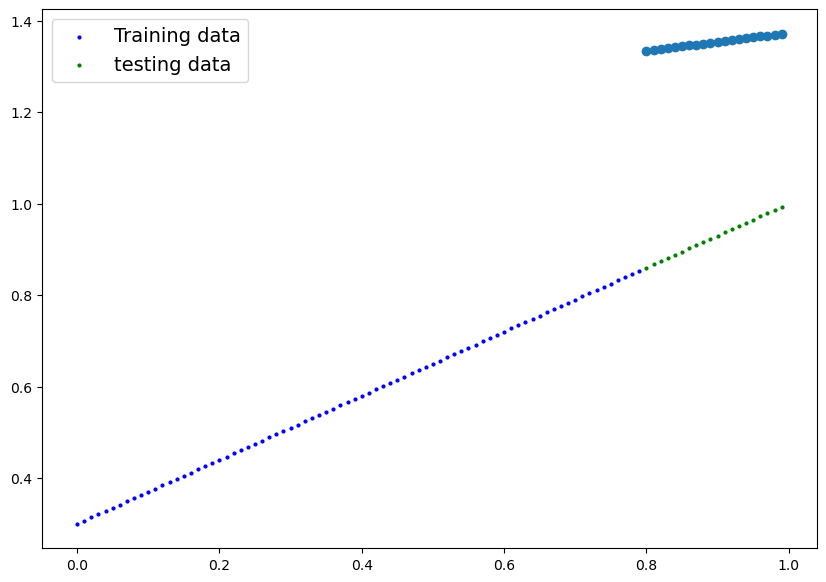

In [21]:
plot_predictions(predictions=y_preds)

In [28]:
torch.manual_seed(42)

epochs = 200 
epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):

    model_0.train()
    
    y_pred = model_0(X_train)
   
    loss = loss_function(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():

     test_pred = model_0(X_test)
     test_loss = loss_function(test_pred,y_test)
     if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
      print(model_0.state_dict())


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
#djiksta algorithm at c++

plt.plot(epoch_count,loss_values, label = 'Train Loss')
plt.plot(epoch_count,test_loss_values, label = 'Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

model_0.state_dict()


